Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.25      0.37       198
           comp.graphics       0.69      0.69      0.69       245
 comp.os.ms-windows.misc       0.69      0.67      0.68       242
comp.sys.ibm.pc.hardware       0.60      0.78      0.68       238
   comp.sys.mac.hardware       0.83      0.69      0.75       250
          comp.windows.x       0.88      0.81      0.84       260
            misc.forsale       0.78      0.68      0.73       241
               rec.autos       0.86      0.77      0.81       244
         rec.motorcycles       0.51      0.80      0.62       219
      rec.sport.baseball       0.94      0.83      0.88       261
        rec.sport.hockey       0.87      0.91      0.89       245
               sci.crypt       0.70      0.85      0.76       251
         sci.electronics       0.84      0.62      0.71       249
                 sci.med       0.92      0.84      

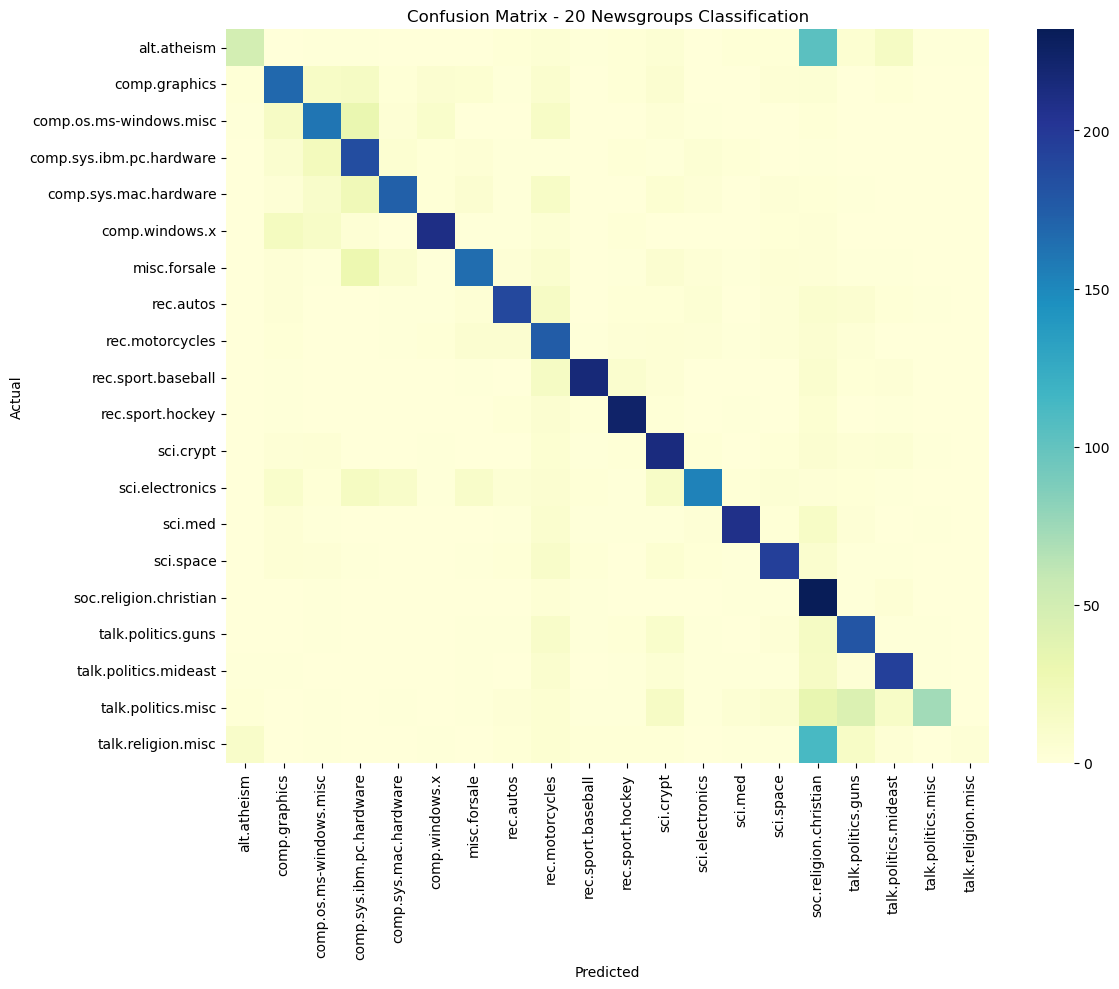

In [1]:
# Pattern Recognition System: Text Classification on 20 Newsgroups Dataset

# Step 1: Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
categories = None  # use all 20 categories
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    newsgroups_data.data, newsgroups_data.target, test_size=0.25, random_state=42
)

# Step 4: Create a pattern recognition pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('clf', MultinomialNB())
])

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Predict on test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
print("Classification Report:\n")
print(metrics.classification_report(y_test, y_pred, target_names=newsgroups_data.target_names))

# Step 8: Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, xticklabels=newsgroups_data.target_names, yticklabels=newsgroups_data.target_names, 
            cmap="YlGnBu", annot=False, fmt='d')
plt.title("Confusion Matrix - 20 Newsgroups Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
df = pd.read_csv(r"C:\Users\Shaikh Irfan\Downloads\drive-download-20250419T131102Z-001\20newsgroups_dataset [GRP A2].csv")
df.head(5)

,text,newsgroup
0,I was wondering if anyone out there could enli...,rec.autos
1,A fair number of brave souls who upgraded thei...,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",sci.space


In [30]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [31]:
x_train , x_test, y_train, y_test = train_test_split(df['text'],df['newsgroup'],test_size=0.2,random_state=42)

In [32]:
model = Pipeline([('tidif',TfidfVectorizer(stop_words='english',max_df=0.7)),
                 ('clf',MultinomialNB())])

In [33]:
model.fit(x_train,y_train)

Pipeline(steps=[('tidif', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('clf', MultinomialNB())])

In [34]:
y_pred = model.predict(x_test)

In [39]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.92      0.30      0.45       162
           comp.graphics       0.69      0.73      0.71       188
 comp.os.ms-windows.misc       0.69      0.70      0.70       196
comp.sys.ibm.pc.hardware       0.59      0.76      0.66       188
   comp.sys.mac.hardware       0.85      0.71      0.77       198
          comp.windows.x       0.86      0.81      0.83       192
            misc.forsale       0.81      0.78      0.79       192
               rec.autos       0.83      0.83      0.83       183
         rec.motorcycles       0.90      0.75      0.81       218
      rec.sport.baseball       0.91      0.85      0.88       194
        rec.sport.hockey       0.89      0.91      0.90       197
               sci.crypt       0.65      0.87      0.74       178
         sci.electronics       0.82      0.69      0.75       185
                 sci.med       0.88      0.85      0.87       192
         

In [ ]:
import seaborn as sns
con = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(con,xticklabels=df['newsgroup'],yticklabels=df['newsgroup'])
plt.show()